<h1><center> Netflix Datset EDA </center> </h1>

In [1]:
# loading importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
# finding total number of null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
# droppig director
df=df.drop(["director"],axis=1)

In [7]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
# filling all Nan values as unknown in date_added column 
df.date_added.fillna("unknown",inplace= True)

In [9]:
df.isnull().sum()

show_id           0
type              0
title             0
cast            718
country         507
date_added        0
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [10]:
df["release_year"].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1959       1
1966       1
1925       1
1964       1
1947       1
Name: release_year, Length: 73, dtype: int64

In [11]:
# making another column year and extracting year from date_added
df["year"]= df.date_added.apply(lambda x: str(x).split(",")[-1])

In [12]:
df["year"].value_counts()

 2019      2153
 2020      2009
 2018      1685
 2017      1225
 2016       443
 2021       117
 2015        88
 2014        25
 2011        13
 2013        11
unknown      10
 2012         3
 2009         2
 2008         2
 2010         1
Name: year, dtype: int64

In [13]:
# replaying unknows in year columns with 2019 as it has appeared most 
df["year"]= df.year.apply(lambda x: str(x).replace("unknown","2019"))
# removing extra space
df["year"]= df.year.apply(lambda x: str(x).replace(" ",""))

In [14]:
df.year.value_counts()

2019    2163
2020    2009
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: year, dtype: int64

In [15]:
df.country.value_counts() #displaying the most occurred country

United States                                       2555
India                                                923
United Kingdom                                       397
Japan                                                226
South Korea                                          183
                                                    ... 
Ghana, United States                                   1
United Kingdom, Germany, Canada, United States         1
United Kingdom, Australia, Canada, United States       1
United States, Mexico, Spain, Malta                    1
Norway, United States                                  1
Name: country, Length: 681, dtype: int64

In [16]:
# filling null values of country with most occuring country
df.country.fillna("United_states",inplace= True)

In [17]:
df.rating.value_counts() 

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [18]:
# filling null values of rating with most occuring rating
df.rating.fillna("TV-MA",inplace= True)

In [19]:
df.isnull().sum()

show_id           0
type              0
title             0
cast            718
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
year              0
dtype: int64

Text(0, 0.5, 'Number of Country')

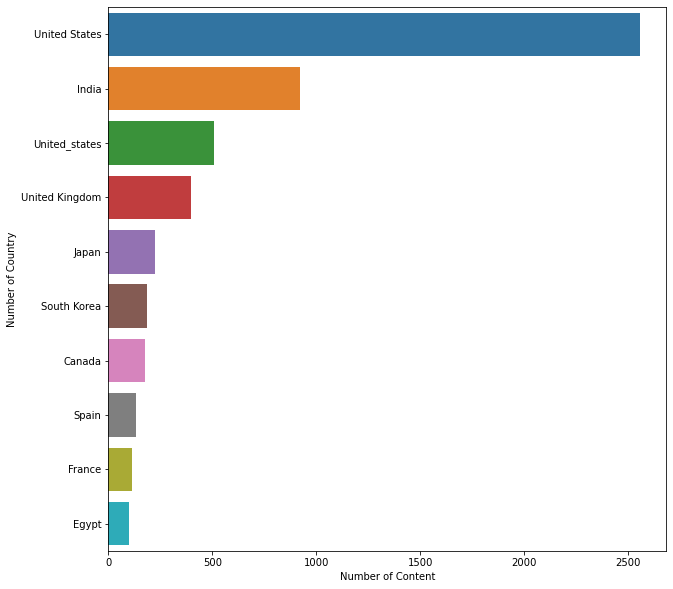

In [20]:
# showing TOP 10 country wise content
x=df.country.value_counts().head(10) #for top 10
plt.figure(figsize=(10,10))
ax=sns.barplot(x.values,x.index)
ax.set_xlabel("Number of Content")
ax.set_ylabel("Number of Country")

Text(0, 0.5, 'count')

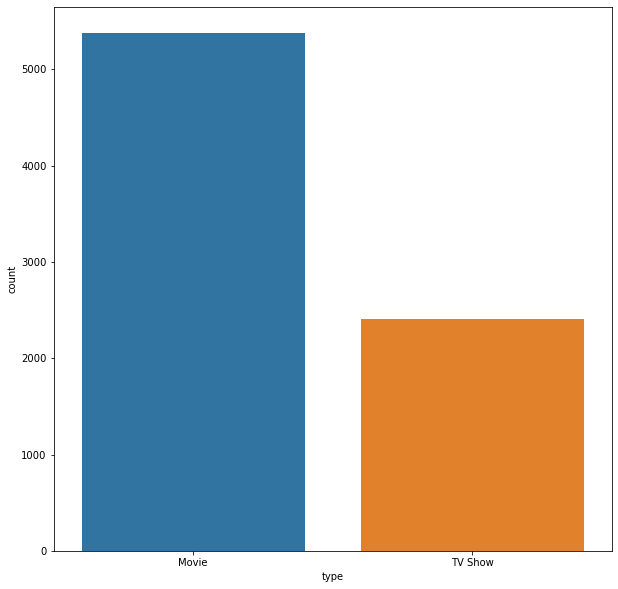

In [21]:
# Showing number of contents under Movie or Tv series tag
plt.figure(figsize=(10,10))
x=df.type.value_counts()
ax=sns.barplot(x.index,x.values)
ax.set_xlabel("type")
ax.set_ylabel("count")

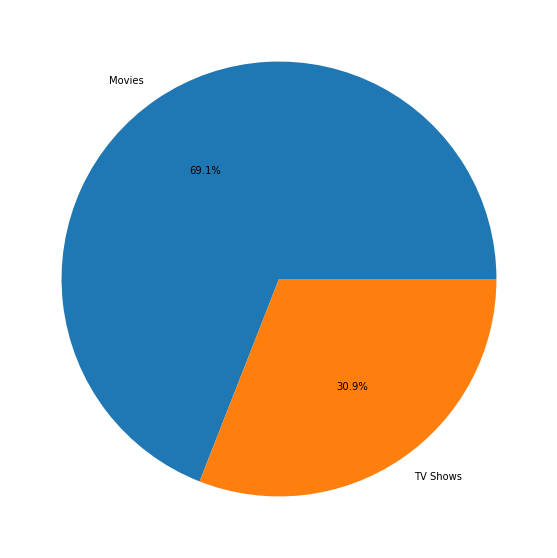

In [22]:
# showing piechat of the above data 
plt.figure(figsize=(10,10))
plt.pie(x.values,labels=["Movies","TV Shows"],autopct="%1.1f%%")
plt.show()

<AxesSubplot:xlabel='Year'>

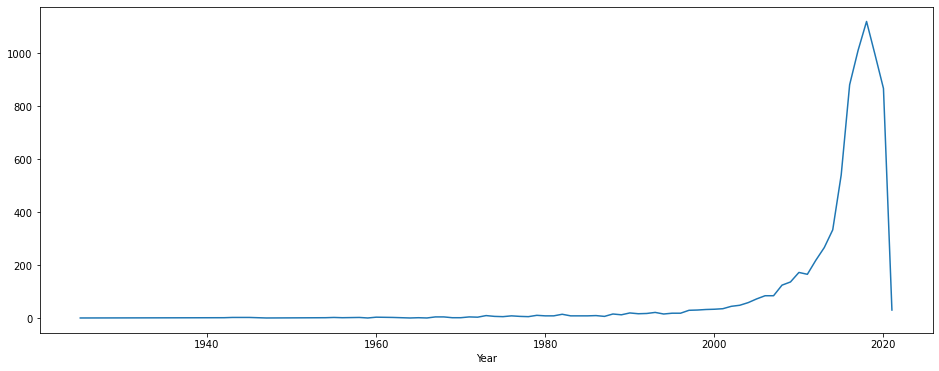

In [23]:
# Netflix content releases over the years
x= df.release_year.value_counts()
plt.figure(figsize=(16,6))
plt.xlabel("Year")
sns.lineplot(x=x.index ,y= x.values)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

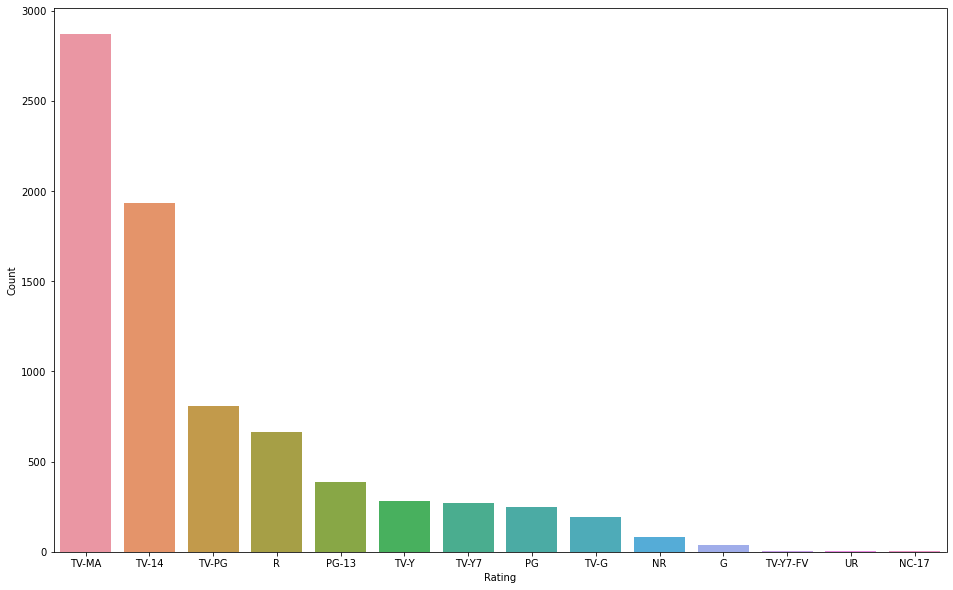

In [24]:
# Showing  no. of contents in different ratings 
x=df.rating.value_counts()
plt.figure(figsize=(16,10))
plt.xlabel("Rating")
plt.ylabel("Count")
sns.barplot(x=x.index ,y= x.values)

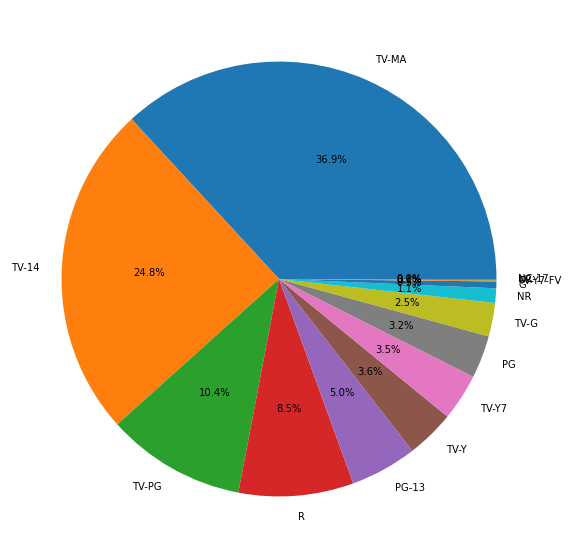

In [25]:
# Pie chart of the same above data 
plt.figure(figsize=(10,10))
plt.pie(x.values,labels=x.index,autopct="%1.1f%%")
plt.show()

<AxesSubplot:xlabel='Year'>

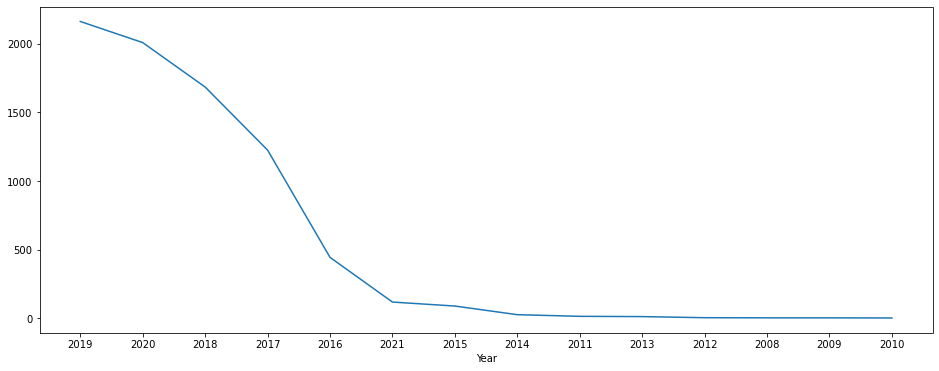

In [26]:
# Number of content added on Netflix over the years
x= df.year.value_counts()
plt.figure(figsize=(16,6))
plt.xlabel("Year")
sns.lineplot(x=x.index ,y= x.values)

<AxesSubplot:xlabel='Year'>

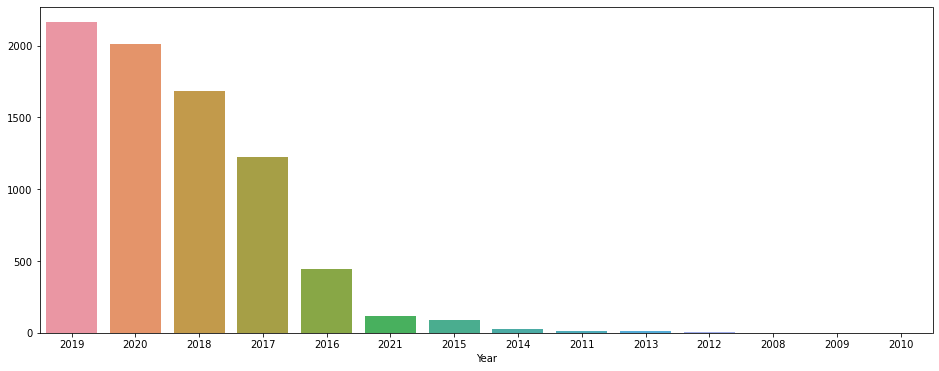

In [27]:
# Bar chart of the same above data 
x= df.year.value_counts()
plt.figure(figsize=(16,6))
plt.xlabel("Year")
sns.barplot(x=x.index ,y= x.values)

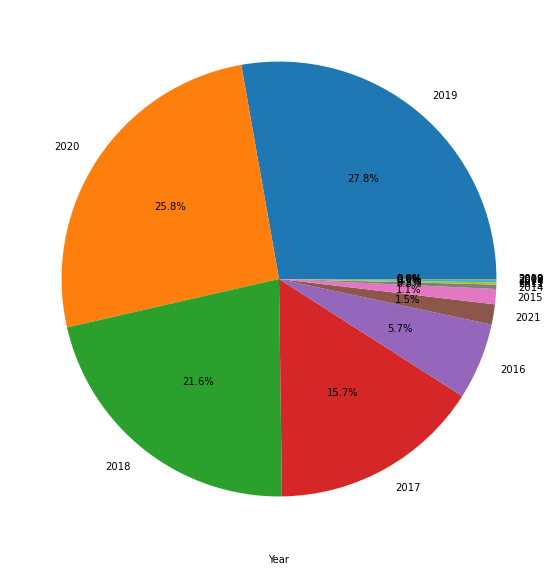

In [28]:
# Showing pie chart of the same 
x= df.year.value_counts()
plt.figure(figsize=(10,10))
plt.xlabel("Year")
plt.pie(x.values,labels=x.index ,autopct="%1.1f%%")
plt.show()

<h1><center> THE END </center> </h1>